**Identify driver drowsiness through face expression**

In [1]:
!python -m pip install -r requirements.txt -q

In [2]:
import numpy as np 
import pandas as pd 
import os

# Importing dependencies

In [3]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models

# Viewing image paths and directories

In [4]:
train_data_dir = os.path.join('Drowsy_dataset/train')
test_data_dir = os.path.join('Drowsy_dataset/test')
training_files = os.listdir(train_data_dir)
testing_files = os.listdir(test_data_dir)
print(f"Training data directory : ", train_data_dir)
print(f"Testing data directory : ", test_data_dir)
print(f"Training data files: ", training_files)
print(f"Testing data files : ", testing_files)

Training data directory :  Drowsy_dataset/train
Testing data directory :  Drowsy_dataset/test
Training data files:  ['DROWSY', 'NATURAL']
Testing data files :  ['DROWSY', 'NATURAL']


In [5]:
train_drowsy_image_path = os.path.join(train_data_dir , 'DROWSY')
train_natural_image_path = os.path.join(train_data_dir, 'NATURAL')
train_drowsy_images= os.listdir(train_drowsy_image_path)
train_natural_images= os.listdir(train_natural_image_path)

test_drowsy_image_path = os.path.join(test_data_dir , 'DROWSY')
test_natural_image_path = os.path.join(test_data_dir, 'NATURAL')
test_drowsy_images= os.listdir(test_drowsy_image_path)
test_natural_images= os.listdir(test_natural_image_path)

print(" Number of files in the training dataset as per class")
print(f" Number of image files in the DROWSY train folder : {len(train_drowsy_images)}")
print(f" Number of image files in the NATURAL test folder : {len(train_natural_images)} ")
print("\n Number of files in the testing dataset as per class ")
print(f" Number of image files in the DROWSY train folder : {len(test_drowsy_images)}")
print(f" Number of image files in the NATURAL test folder : {len(test_natural_images)} ")

 Number of files in the training dataset as per class
 Number of image files in the DROWSY train folder : 2809
 Number of image files in the NATURAL test folder : 3050 

 Number of files in the testing dataset as per class 
 Number of image files in the DROWSY train folder : 757
 Number of image files in the NATURAL test folder : 726 


(48, 48, 3)


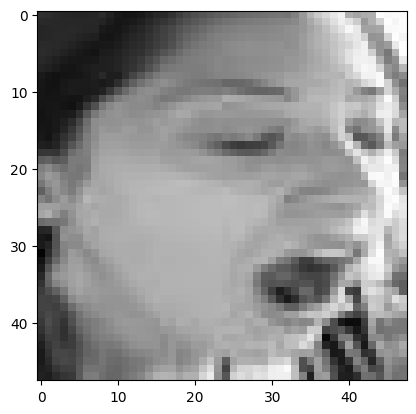

In [6]:
img = cv2.imread(os.path.join(train_drowsy_image_path, train_drowsy_images[0]))
hight, width, channels = img.shape
plt.imshow(img)
print(img.shape)

# Visualizing the the data images

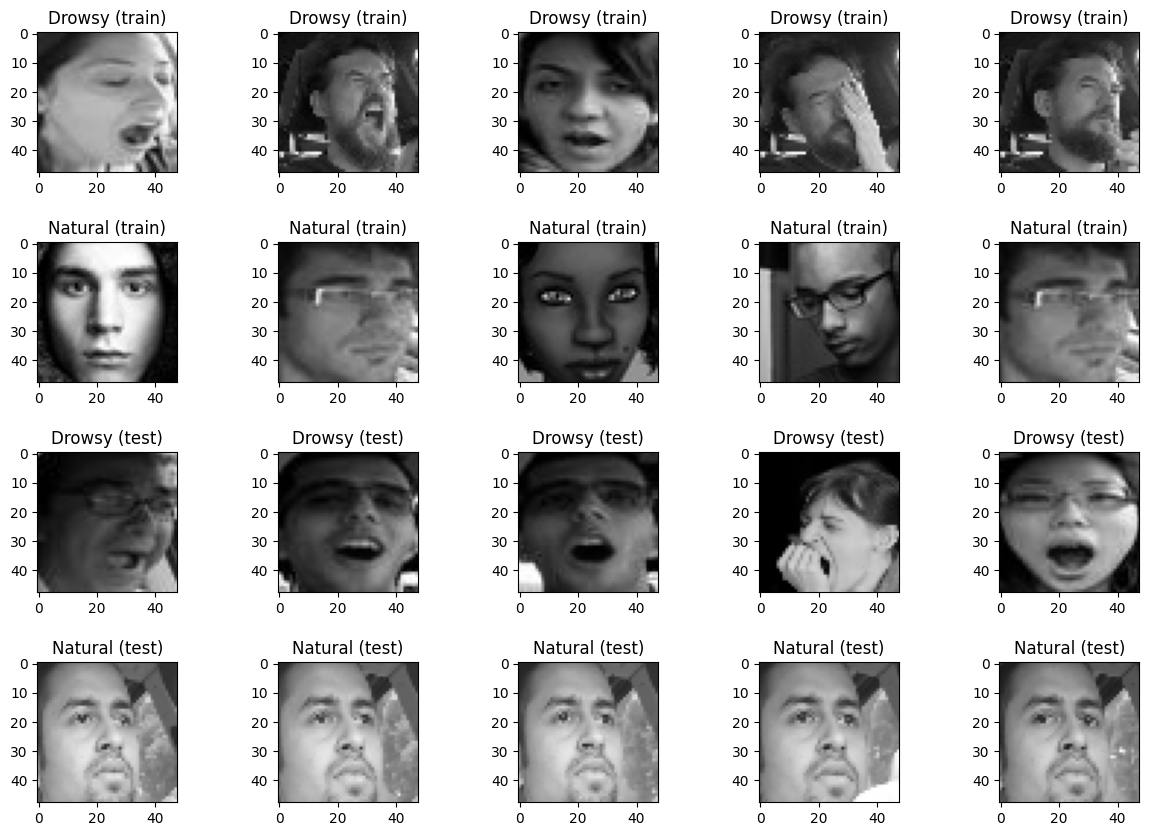

In [7]:
fig, axes = plt.subplots(4, 5, figsize=(15, 10))

for i, axes in enumerate(axes.flat):
    if i < 5:
        img = cv2.imread(os.path.join(train_drowsy_image_path, train_drowsy_images[i]))
        axes.imshow(img)
        axes.set_title('Drowsy (train)')
    if i > 4 and i < 10:
        img = cv2.imread(os.path.join(train_natural_image_path, train_natural_images[i]))
        axes.imshow(img)
        axes.set_title('Natural (train)')
    if i > 9 and i < 15:
        img = cv2.imread(os.path.join(test_drowsy_image_path, test_drowsy_images[i]))
        axes.imshow(img)
        axes.set_title('Drowsy (test)')
    if i > 14 and i < 20:
        img = cv2.imread(os.path.join(test_natural_image_path, test_natural_images[i]))
        axes.imshow(img)
        axes.set_title('Natural (test)')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Splitting the data into Training , Testing and Vallidation set

In [8]:
data_generator = ImageDataGenerator(
    rescale = 1./255.0,
    validation_split = 0.2,
    rotation_range=20, # data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_data_generator = ImageDataGenerator(
    rescale= 1./255.0,
)

train_data_gen = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(48,48),
    class_mode='binary',
    batch_size= 32,
    subset='training',
    shuffle=True
)

val_data_gen = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(48,48),
    class_mode='binary',
    batch_size=32,
    subset='validation',
    shuffle=True
)

test_data_gen = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size = (48,48),
    class_mode = 'binary',
    batch_size = 32,
    shuffle=True
)

Found 4688 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.


In [9]:
print(f"Training data samples :  {train_data_gen.samples} {train_data_gen.class_indices}")
print(f"Testing data samples : {test_data_gen.samples} {test_data_gen.class_indices}")

Training data samples :  4688 {'DROWSY': 0, 'NATURAL': 1}
Testing data samples : 1483 {'DROWSY': 0, 'NATURAL': 1}


# Constructing the neural network

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

d:\Drowsiness-Detection-CV\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,417 (4.14 MB)

 Trainable params: 1,084,417 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [11]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // train_data_gen.batch_size,
    epochs=10,
    validation_data = val_data_gen,
    validation_steps = val_data_gen.samples // val_data_gen.batch_size
)

d:\Drowsiness-Detection-CV\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5857 - loss: 0.6710

d:\Drowsiness-Detection-CV\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.6518 - loss: 0.6074 - val_accuracy: 0.5217 - val_loss: 0.8151
Epoch 2/10
  1/146 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7500 - loss: 0.5624

d:\Drowsiness-Detection-CV\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.5624 - val_accuracy: 0.5078 - val_loss: 0.8454
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7348 - loss: 0.5202 - val_accuracy: 0.5851 - val_loss: 0.7195
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7188 - loss: 0.5473 - val_accuracy: 0.5885 - val_loss: 0.7098
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7573 - loss: 0.5049 - val_accuracy: 0.5608 - val_loss: 0.7910
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.4561 - val_accuracy: 0.5477 - val_loss: 0.7850
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7751 - loss: 0.4767 - val_accuracy: 0.5729 - val_loss: 0.7635
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7500 - loss: 0.4327 - val_accuracy: 0.5773 - val_loss: 0.7782
Epoch 9/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7861 - loss: 0.4642 - val_accuracy: 0.5868 - 

# Visualizing the training results

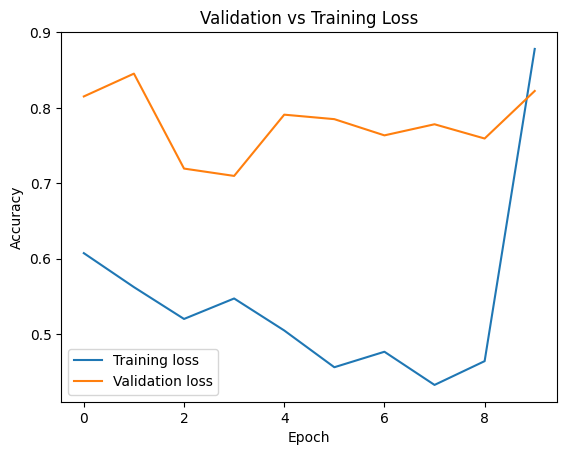

In [12]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation vs Training Loss')
plt.legend()
plt.show()

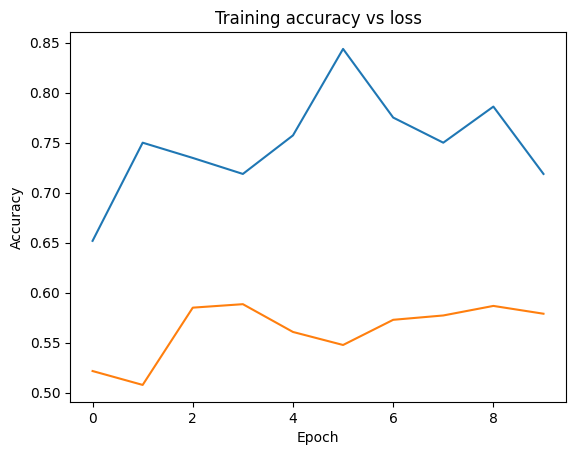

In [13]:
plt.plot(history.history['accuracy'], label='Validation accuracy')
plt.plot(history.history['val_accuracy'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training accuracy vs loss")
plt.show()

# Testing the model on the test dataset

In [14]:
loss , accuracy = model.evaluate(test_data_gen)

47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.8577 - loss: 0.3059


In [15]:
print(f"The training loss is : {history.history['loss'][-1]}")
print(f"The testing loss is : {loss}")

print(f"Training accuracy is : {history.history['accuracy'][-1]}")
print(f"Testing accuracy is : {accuracy}")

The training loss is : 0.8781156539916992
The testing loss is : 0.3058585226535797
Training accuracy is : 0.71875
Testing accuracy is : 0.8577208518981934
